### DEVELOPMENT with package loaded from GitHub

ADD THE PACKAGE FROM GITHUB

julia> ]

(v1.1) pkg> add https://github.com/rbontekoe/RbO.jl

### DEVELOPMENT with local package

push!(LOAD_PATH, "/home/rob/julia_projects/RbO.jl/src/")

println(LOAD_PATH)

Load packages

In [1]:
using RbO, Plots, Statistics
pyplot()

Plots.PyPlotBackend()

### Define Enumerator values from Domain.jl

SubscriberType enumerator values

In [2]:
STD_CALCULATOR = RbO.STD_CALCULATOR
MEAN_CALCULATOR = RbO.MEAN_CALCULATOR
PLOTTER = RbO.PLOTTER

PLOTTER::SubscriberType = 2

PublisherType enumerator values

In [3]:
NEWSPAPER = RbO.NEWSPAPER
MAGAZINE = RbO.MAGAZINE
SOCIAL_MEDIA = RbO.SOCIAL_MEDIA

SOCIAL_MEDIA::PublisherType = 2

### Create subscribers

In [4]:
daisy = createSubscriber( "Daisy Duck", "daisy@duckcity.com" )
donald = createSubscriber( "Donald Duck", "donald@duckcity.com", STD_CALCULATOR )
scrooge = createSubscriber( "Scrooge McDuck", "scrooge@duckcity.com", PLOTTER )
mickey = createSubscriber( "Micky Mouse" )

Subscriber("Micky Mouse", "", MEAN_CALCULATOR::SubscriberType = 0)

### Create newspapers and magazines

In [5]:
chronicals = createPublisher( "the Duck Chronicals" )

Publisher("the Duck Chronicals", NEWSPAPER::PublisherType = 0, Subscriber[])

Add subscribers to the Duck Chronicals

In [6]:
subscribe( chronicals, daisy )
subscribe( chronicals, donald )
subscribe( chronicals, scrooge )
subscribe( chronicals, mickey )

Publisher("the Duck Chronicals", NEWSPAPER::PublisherType = 0, Subscriber[Subscriber("Daisy Duck", "daisy@duckcity.com", MEAN_CALCULATOR), Subscriber("Donald Duck", "donald@duckcity.com", STD_CALCULATOR), Subscriber("Scrooge McDuck", "scrooge@duckcity.com", PLOTTER), Subscriber("Micky Mouse", "", MEAN_CALCULATOR)])

Unsubscribe Mickey Mouse

In [7]:
chronicals = unsubscribe(chronicals, mickey)

Publisher("the Duck Chronicals", NEWSPAPER::PublisherType = 0, Subscriber[Subscriber("Daisy Duck", "daisy@duckcity.com", MEAN_CALCULATOR), Subscriber("Donald Duck", "donald@duckcity.com", STD_CALCULATOR), Subscriber("Scrooge McDuck", "scrooge@duckcity.com", PLOTTER)])

### Define message for the Duck Chronical subscribers

In [8]:
message = createMessage( "Weather station", "Temperatures", [10.9, 12, 10.5, 12.7, 10.2] )

Message("Weather station", "Temperatures", [10.9, 12.0, 10.5, 12.7, 10.2])

### Print the messages

In [9]:
paper = chronicals

Publisher("the Duck Chronicals", NEWSPAPER::PublisherType = 0, Subscriber[Subscriber("Daisy Duck", "daisy@duckcity.com", MEAN_CALCULATOR), Subscriber("Donald Duck", "donald@duckcity.com", STD_CALCULATOR), Subscriber("Scrooge McDuck", "scrooge@duckcity.com", PLOTTER)])

List with the subscribers of a newspaper or magazine

In [10]:
sm = map( x -> x.email == "" ? x.name : x.name * " - " * x.email, paper.list )

3-element Array{String,1}:
 "Daisy Duck - daisy@duckcity.com"      
 "Donald Duck - donald@duckcity.com"    
 "Scrooge McDuck - scrooge@duckcity.com"

Print the subscribers

In [11]:
len =  length( "Subscribers of " * paper.name * string(paper.publishertype )) + 5
println( "\n" * "="^len )
title = titlecase( string( paper.publishertype ) )
println( " Subscribers of " * paper.name * " - " * map(x -> x == '_' ? ' ' : x , title ) )
println( "="^len )

for subscriber in sm
    println( " " * subscriber )
end
println( '='^len )


 Subscribers of the Duck Chronicals - Newspaper
 Daisy Duck - daisy@duckcity.com
 Donald Duck - donald@duckcity.com
 Scrooge McDuck - scrooge@duckcity.com


### Define the function 'processMeesgae' to process data depending on SubsriberType

In [12]:
result = []
processMessage( s::Subscriber, n::Publisher, m::Message ) = begin
    if s.subscribertype == STD_CALCULATOR
        println( s.name * ":\t the standard deviation of the last five temperatures is: " * string( round( std(m.body); digits=2) ) * " °C" )
    elseif s.subscribertype == MEAN_CALCULATOR
        #println( s.name * ":\t the average of the last five temperatures is: " * string(sum(m.body) / length(m.body)) * " °C" )
        println( s.name * ":\t the average of the last five temperatures is: " * string( mean( m.body ) ) * " °C" )
    elseif s.subscribertype == PLOTTER
        println( s.name * ":\t the dataset with the last five temperatures is: " * string( m.body ) )
        global result = m.body
    end
end

processMessage (generic function with 1 method)

### Notify scubscribers

In [13]:
sendMessage( chronicals, message, processMessage )

Daisy Duck:	 the average of the last five temperatures is: 11.26 °C
Donald Duck:	 the standard deviation of the last five temperatures is: 1.05 °C
Scrooge McDuck:	 the dataset with the last five temperatures is: [10.9, 12.0, 10.5, 12.7, 10.2]


### Plot the temperatures

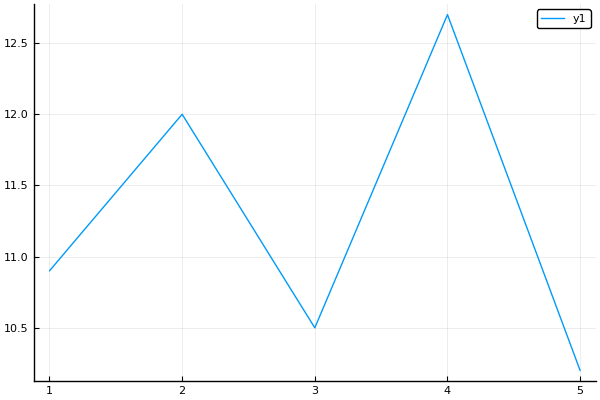

In [14]:
plot(result)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*